In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2022-05-25 16:50:28.953332: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 16:50:28.953392: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.9.1
2.9.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

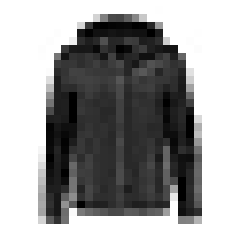

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

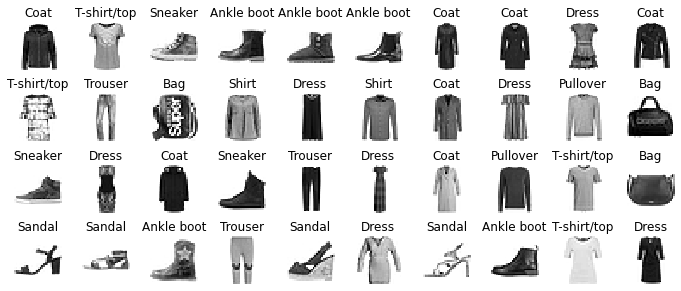

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model1.summary()

model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model2.summary()

model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)        

2022-05-25 16:50:35.579475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 16:50:35.579515: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 16:50:35.579556: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hania-dell): /proc/driver/nvidia/version does not exist
2022-05-25 16:50:35.580163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
sgd = keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam,
              metrics=["accuracy"])
Adam2 = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam2,
              metrics=["accuracy"])

In [13]:
history1 = model1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history2 = model2.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history3 = model3.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2022-05-25 16:50:36.345950: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1710/1719 [============================>.] - ETA: 0s - loss: 0.5075 - accuracy: 0.8207

2022-05-25 16:50:43.996696: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.5068 - accuracy: 0.8210 - val_loss: 0.3753 - val_accuracy: 0.8636
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3749 - accuracy: 0.8635 - val_loss: 0.3473 - val_accuracy: 0.8746
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3405 - accuracy: 0.8732 - val_loss: 0.3345 - val_accuracy: 0.8732
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3175 - accuracy: 0.8819 - val_loss: 0.3192 - val_accuracy: 0.8854
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2998 - accuracy: 0.8893 - val_loss: 0.3056 - val_accuracy: 0.8874
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2831 - accuracy: 0.8950 - val_loss: 0.3325 - val_accuracy: 0.8810
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2711 - accuracy: 0.8998 - val_loss: 0.3076 - val_accuracy: 0.8906
Epo

2022-05-25 16:53:40.326896: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1711/1719 [============================>.] - ETA: 0s - loss: 0.4823 - accuracy: 0.8266

2022-05-25 16:53:46.881265: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.4816 - accuracy: 0.8269 - val_loss: 0.3558 - val_accuracy: 0.8712
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3629 - accuracy: 0.8677 - val_loss: 0.3993 - val_accuracy: 0.8590
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3285 - accuracy: 0.8771 - val_loss: 0.3195 - val_accuracy: 0.8796
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3016 - accuracy: 0.8893 - val_loss: 0.3193 - val_accuracy: 0.8846
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2837 - accuracy: 0.8940 - val_loss: 0.2982 - val_accuracy: 0.8918
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2683 - accuracy: 0.9010 - val_loss: 0.3151 - val_accuracy: 0.8884
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2580 - accuracy: 0.9043 - val_loss: 0.3049 - val_accuracy: 0.8936
Epo

2022-05-25 16:56:47.317716: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.6200 - accuracy: 0.7909 - val_loss: 0.4330 - val_accuracy: 0.8494
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4201 - accuracy: 0.8522 - val_loss: 0.3929 - val_accuracy: 0.8634
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3778 - accuracy: 0.8653 - val_loss: 0.3684 - val_accuracy: 0.8704
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3514 - accuracy: 0.8759 - val_loss: 0.3499 - val_accuracy: 0.8748
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3335 - accuracy: 0.8818 - val_loss: 0.3296 - val_accuracy: 0.8806
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3187 - accuracy: 0.8851 - val_loss: 0.3304 - val_accuracy: 0.8814
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3057 - accuracy: 0.8910 - val_loss: 0.3142 - val_accuracy: 0.8878
Epo

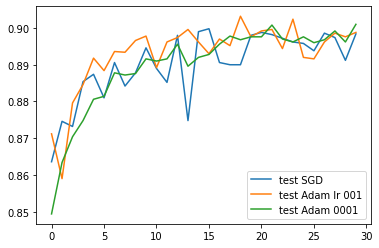

In [14]:
import matplotlib.pyplot as plt
plt.plot(history1.history['val_accuracy'], label = "test SGD")
plt.plot(history2.history['val_accuracy'], label = "test Adam lr 001")
plt.plot(history3.history['val_accuracy'], label = "test Adam 0001")
plt.legend()
plt.show()